# Project 5 WineQulaity

Aim to predict the wine quality from the given dataset.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [33]:
data=pd.read_csv('winered.csv')

In [34]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
data.shape

(1599, 12)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


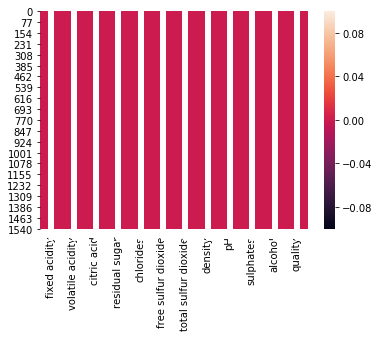

In [37]:
#Lets Check Null Values
sns.heatmap(data.isnull(), annot=True)

In [38]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Statistical Summary

In [39]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the above statistics we can see that their is a huge difference between max and mean for free sulfur dioxide and total sulfur dioxide, there might be some outliers.

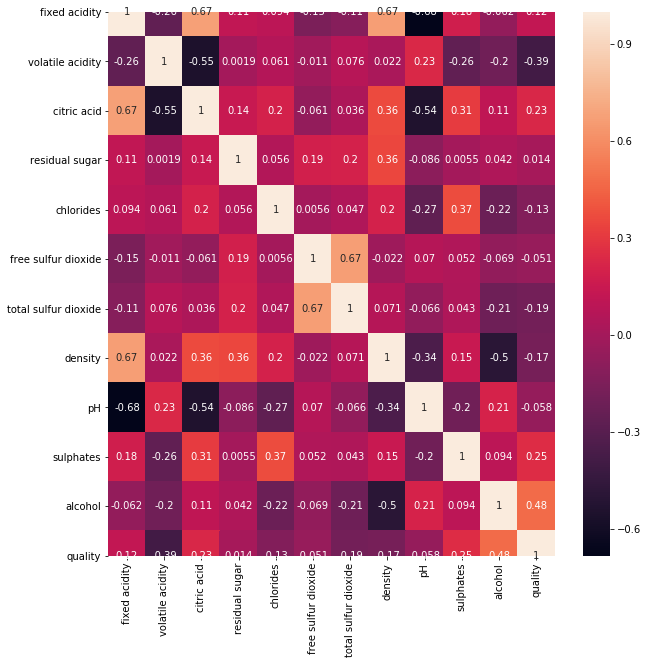

In [40]:
# Lets Check the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)

From the above heatmap we can see that free sulfur dioxide and total sulfur dioxide are highly correlated with each other, and alochol and our output quality is more correlated than other varibles.

In [41]:
#Lets remove the outliers
from scipy.stats import zscore
data=data[(np.abs(zscore(data))<3).all(axis=1)]

In [42]:
data.shape

(1451, 12)

In [43]:
data.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [44]:
for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.cbrt(data[index])

In [45]:
data.skew()

fixed acidity           0.529105
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.629524
chlorides               1.020246
free sulfur dioxide     0.125799
total sulfur dioxide    0.342621
density                 0.055738
pH                      0.114705
sulphates               0.523901
alcohol                 0.646678
quality                 0.407865
dtype: float64

## Lets do the EDA

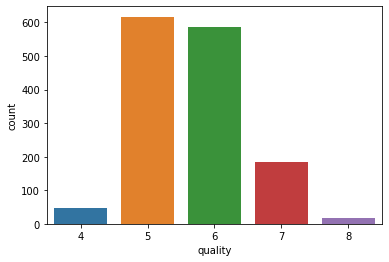

In [46]:
sns.countplot(data['quality'])

From the above we can see that most qulaity of our wine in our data lies between 5 to 6

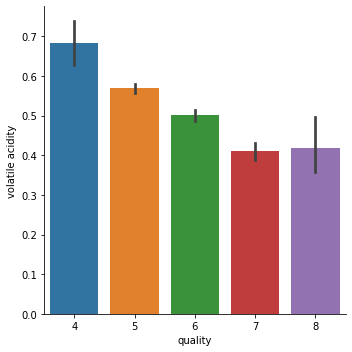

In [47]:
sns.catplot(x='quality',y='volatile acidity',data=data,kind='bar')

From the above we can see that as volatile acidity decreases quality also increases, having negative correlation.

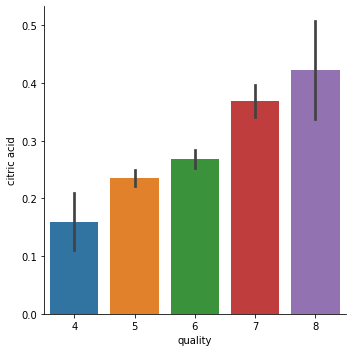

In [48]:
sns.catplot(x='quality',y='citric acid',data=data,kind='bar')

From the above graph we can see that as citric acid increases the quality of the wine increases, having postive correlation.

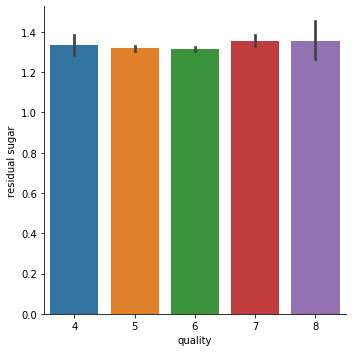

In [49]:
sns.catplot(x='quality',y='residual sugar',data=data,kind='bar')

From the above we can see that for quality 7 and 8 the residual sugar is slightly high.

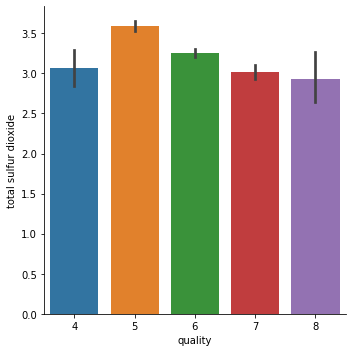

In [50]:
sns.catplot(x='quality',y='total sulfur dioxide',data=data,kind='bar')

From the above graph we can see that total sulphur dioxide in quality 5 is very high and decrease as quality increase.

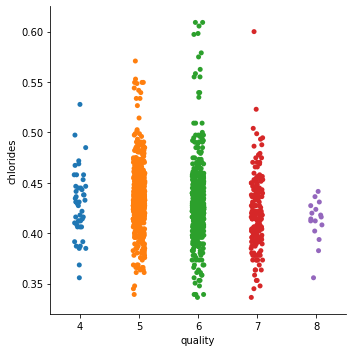

In [51]:
sns.catplot(y='chlorides',x='quality',data=data)

From the above graph we can see that number of chlorides are high in quality 5 and 6.

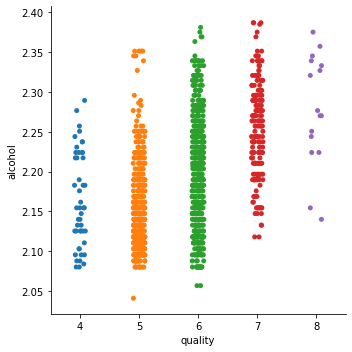

In [52]:
sns.catplot(y='alcohol',x='quality',data=data)

Fromthe above graph we can see that alcohol content in quality 5 and 6 are relatively high.

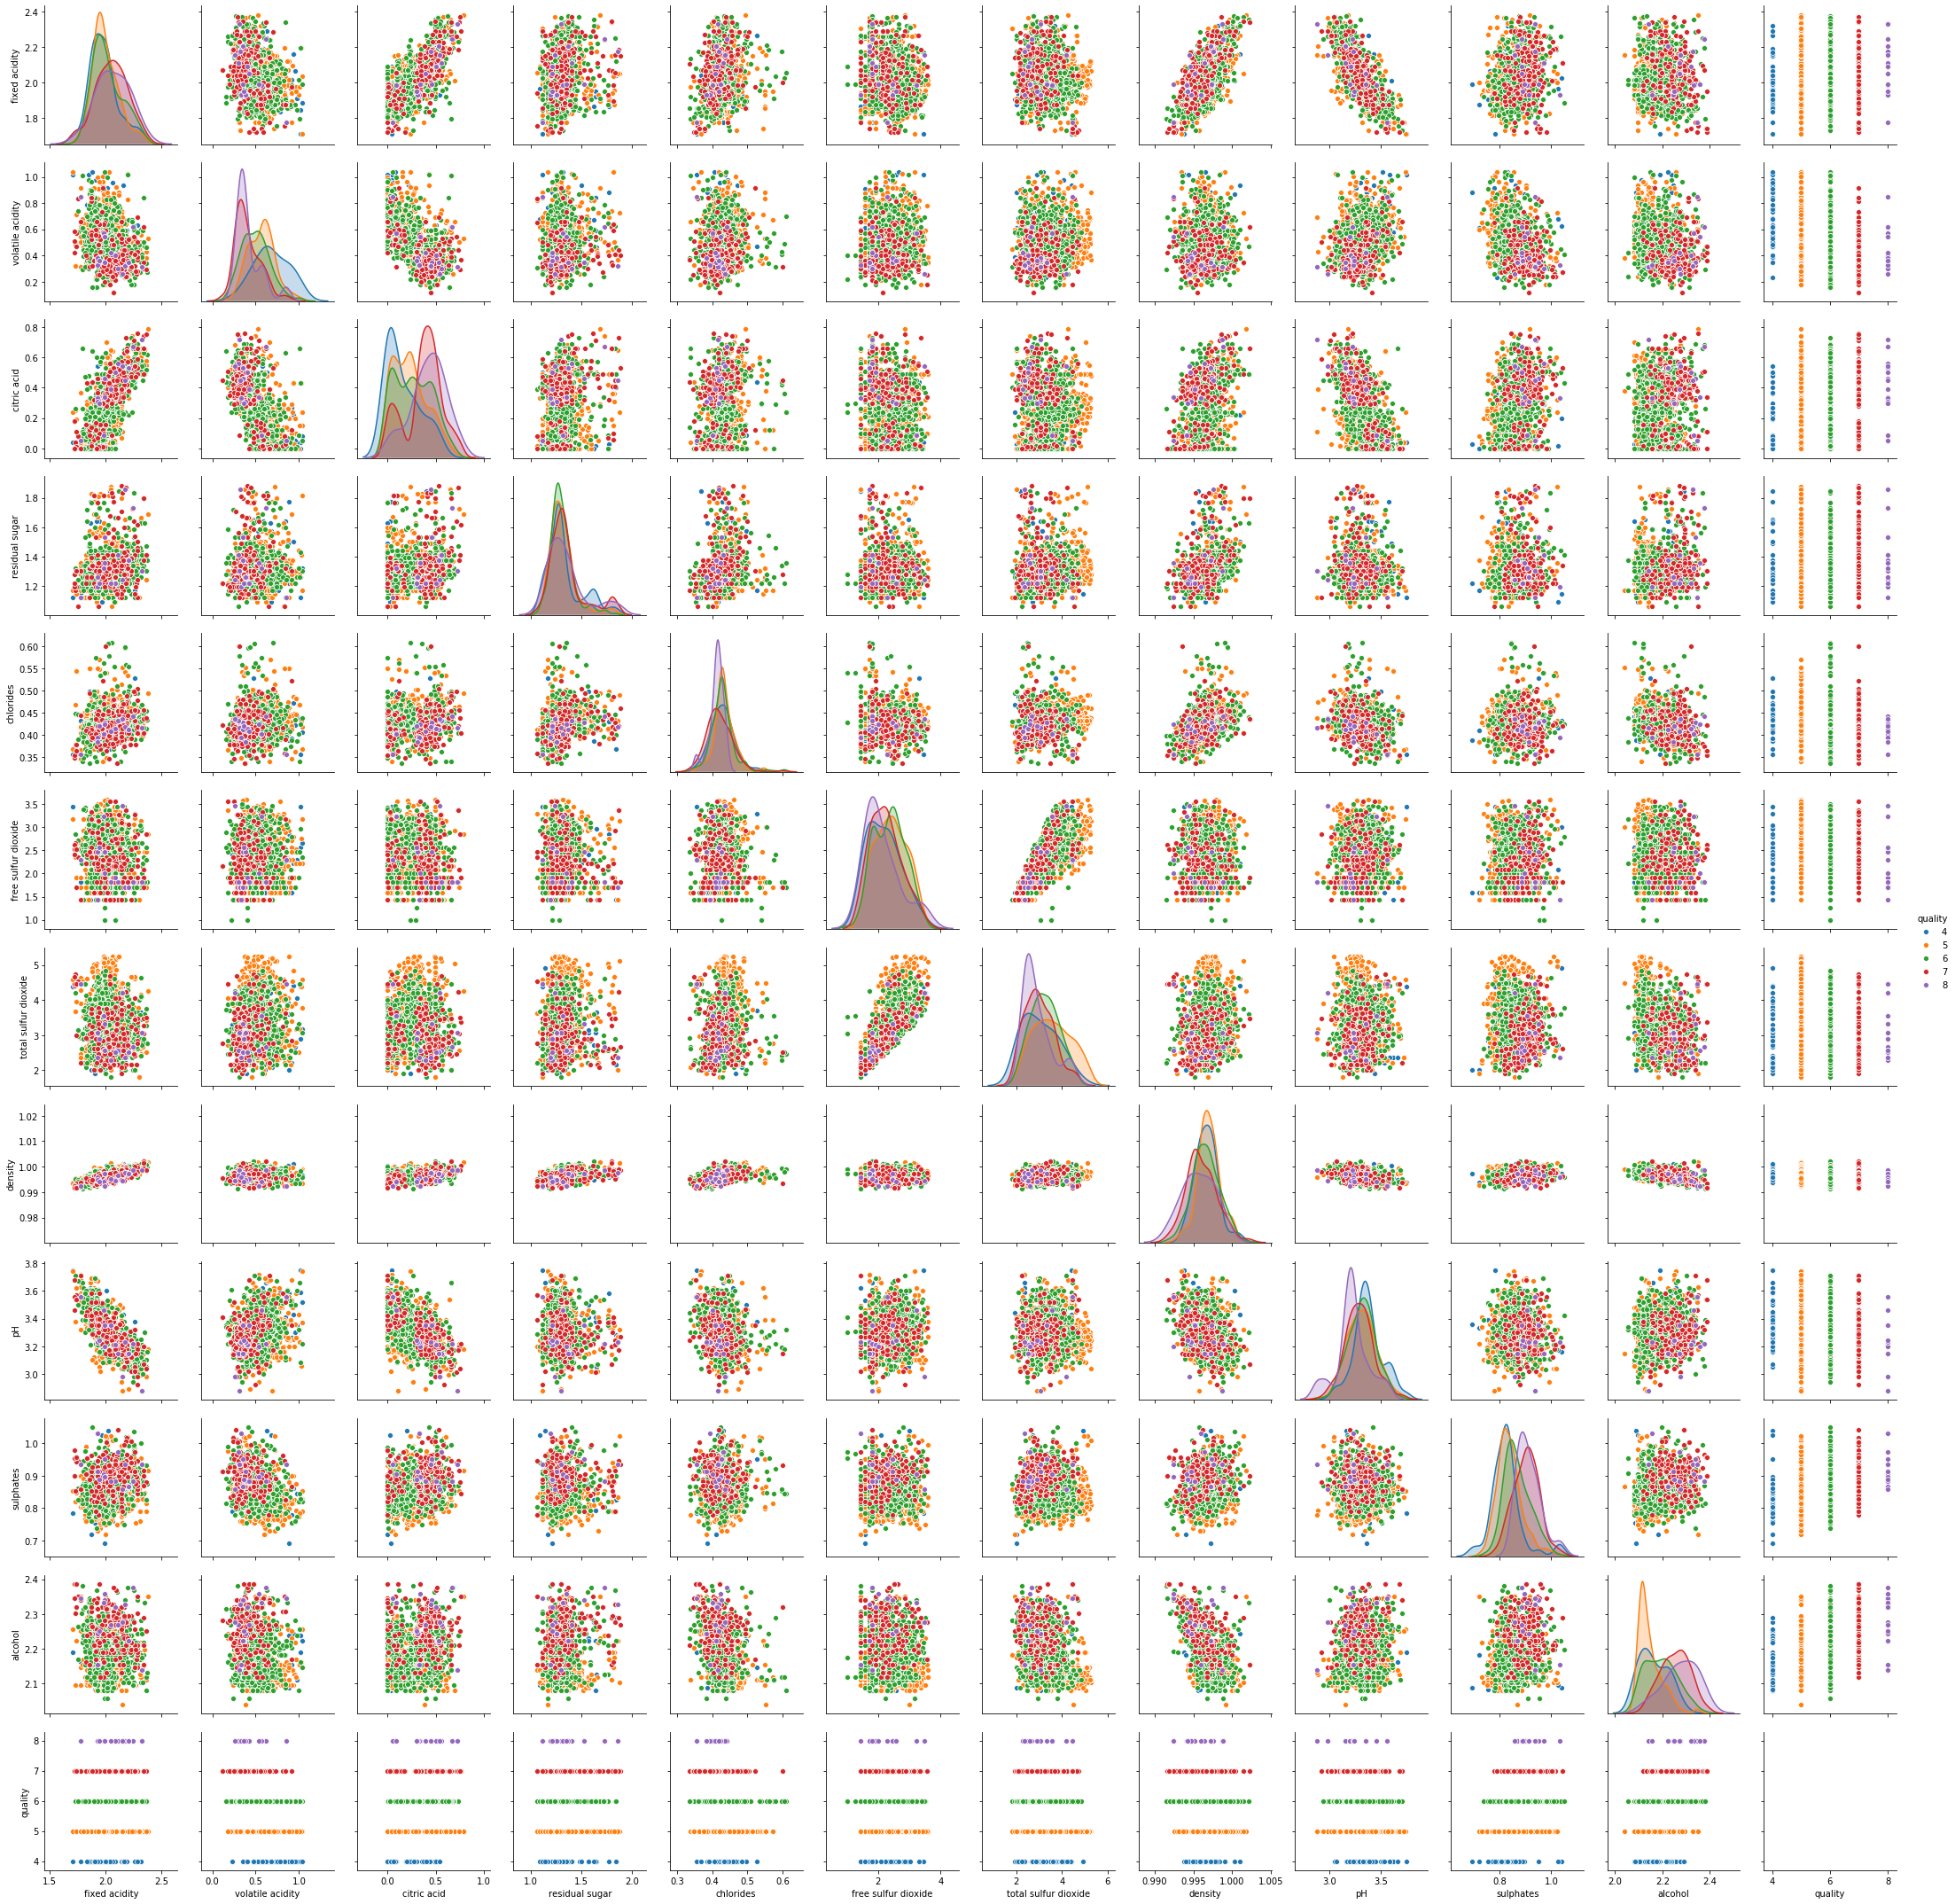

In [53]:
sns.pairplot(data,hue='quality')

## Spliting the independent and dependent variables
 

In [54]:
x=data.iloc[:,:-1]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.948695,0.70,0.00,1.238562,0.423582,2.223980,3.239612,0.9978,3.51,0.824257,2.110454
1,1.983192,0.88,0.00,1.375069,0.461044,2.924018,4.061548,0.9968,3.20,0.879366,2.139975
2,1.983192,0.76,0.04,1.320006,0.451436,2.466212,3.779763,0.9970,3.26,0.866239,2.139975
3,2.237378,0.28,0.56,1.238562,0.421716,2.571282,3.914868,0.9980,3.16,0.833955,2.139975
4,1.948695,0.70,0.00,1.238562,0.423582,2.223980,3.239612,0.9978,3.51,0.824257,2.110454


In [55]:
y=data.iloc[:,-1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [57]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=40)

In [58]:
x_train.shape,x_test.shape

((870, 11), (581, 11))

In [59]:
y_train.shape,y_test.shape

((870,), (581,))

## Implementing ML Algorithms

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [61]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=2)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=2)
RFR=RandomForestRegressor(random_state=2)
GBR=GradientBoostingRegressor(random_state=2)

In [62]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [63]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [64]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ ',name,'/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ ')
    print('\n')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,2))
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(round(mae,2))
    rmse=np.sqrt(mse)
    print("Mean_Squared_Error =",rmse)
    RMSE.append(round(rmse,2))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\  LinearRegression /*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.3844057252145412
Mean_Squared_Error = 0.38653428597031864
Mean_Absolute_Error = 0.488316735523596
Mean_Squared_Error = 0.6217188158406649
Cross_Val_Score =  0.29127777479734174


/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\  Lasso /*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ 


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.001531939789845227
Mean_Squared_Error = 0.6288662014572075
Mean_Absolute_Error = 0.6723623558272499
Mean_Squared_Error = 0.7930108457374385
Cross_Val_Score =  -0.11596430497085701


/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\  Ridge /*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ 


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,

In [65]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.384406,0.39,0.49,0.62,0.291278
1,Lasso,-0.001532,0.63,0.67,0.79,-0.115964
2,Ridge,0.384404,0.39,0.49,0.62,0.291347
3,ElasticNet,-0.001532,0.63,0.67,0.79,-0.115964
4,DecisionTreeRegressor,0.002227,0.63,0.49,0.79,-0.410375
5,KNeighborsRegressor,0.270968,0.46,0.53,0.68,0.157758
6,AdaBoostRegressor,0.316288,0.43,0.52,0.66,0.299990
7,RandomForestRegressor,0.453500,0.34,0.44,0.59,0.231190
8,GradientBoostingRegressor,0.405542,0.37,0.48,0.61,0.311601


From the above comparison of models we can see that the Random Forest Regressor is working the best however it failed to give us R2 more than 90%, so i choose Random Forest Regressor as my final model

Manually Hypertunned, however implementing the classification algorithm by encoding the quality might have given us more accurate result.

In [69]:
from sklearn.externals import joblib
joblib.dump(RFR,"Model_WineRed-Quality.obj")

['Model_WineRed-Quality.obj']

In [70]:
model=joblib.load("Model_WineRed-Quality.obj")

In [71]:
model.predict(x_test)

array([5.7, 5.1, 6.2, 5.5, 6.2, 5.2, 6.1, 5.1, 5.1, 6.6, 5.3, 5.8, 6. ,
       5.4, 5.2, 5.2, 5.1, 6. , 5.4, 5.7, 5.2, 6.6, 5.9, 5.4, 6. , 5.5,
       5.2, 4.8, 5.5, 6.1, 5.9, 5.6, 6.4, 6. , 5. , 5.3, 5.3, 5.3, 5.5,
       5.2, 5.9, 5.2, 5.2, 5.1, 5.4, 5. , 6.1, 5.3, 6.4, 6.5, 6.3, 6.4,
       6. , 6.2, 5.2, 5.5, 5.6, 6.6, 6.2, 6.6, 5.2, 6.9, 5.6, 5.8, 6. ,
       5.5, 5.1, 6.4, 6.9, 5.6, 6.4, 5.4, 5.2, 5.5, 5.4, 6.4, 5. , 6.9,
       5.3, 5.7, 5. , 5.1, 5.3, 5.3, 5.4, 6. , 5.2, 6.3, 6.9, 6.2, 5. ,
       5.5, 6.2, 5.9, 7. , 5. , 5.9, 5.6, 5.4, 5.4, 5.3, 6. , 5.8, 5.9,
       6.5, 5. , 5.1, 7. , 6.2, 5.3, 5.2, 6. , 6.2, 6.5, 6.9, 5.9, 5.9,
       5.2, 5.8, 5.5, 5.2, 5.2, 5.3, 6. , 5.5, 5.3, 6.1, 6.1, 6.5, 5.2,
       7.1, 5.3, 5.9, 5.6, 5.2, 5.4, 4.9, 5.3, 5.5, 5.8, 5. , 5.6, 5.8,
       5.6, 5.3, 5. , 5.7, 4.9, 6.4, 6.6, 5.8, 5.5, 5.2, 5.6, 7.1, 5.5,
       5.4, 5. , 5.6, 5.3, 5.1, 6.4, 6.3, 7. , 5.3, 5.4, 5.3, 5.4, 6.8,
       5.3, 5. , 5.2, 5.9, 5.2, 5.5, 6.7, 6. , 5.5, 5.4, 6. , 5.